In [9]:
import pygor.filehandling
import pygor.load
import pygor.strf.analyse

# External
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
%reload_ext autoreload
%autoreload 2
# Test
user = pathlib.Path(os.getcwd()).parents[-3].stem
user

'simen'

In [2]:
pkls = pygor.filehandling.find_files_in(".pkl", fr"c:\Users\{user}\OneDrive\Data\Pickles", recursive=True)
loaded = pygor.filehandling.pickleload_objects(pkls)

Iterating through and loading listed .pkl files as objects:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

C:\Users\simen\PhD\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\simen\PhD\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\simen\PhD\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\simen\PhD\pygor\src\pygor\utilities.py:173: UserWarning: Destructive method. You lose data, with no way of recovering original shape!
  warnings.warn("Destructive method. You lose data, with no way of recovering original shape!")
C:\Users\simen\PhD\pygor\src\pygor\utilities

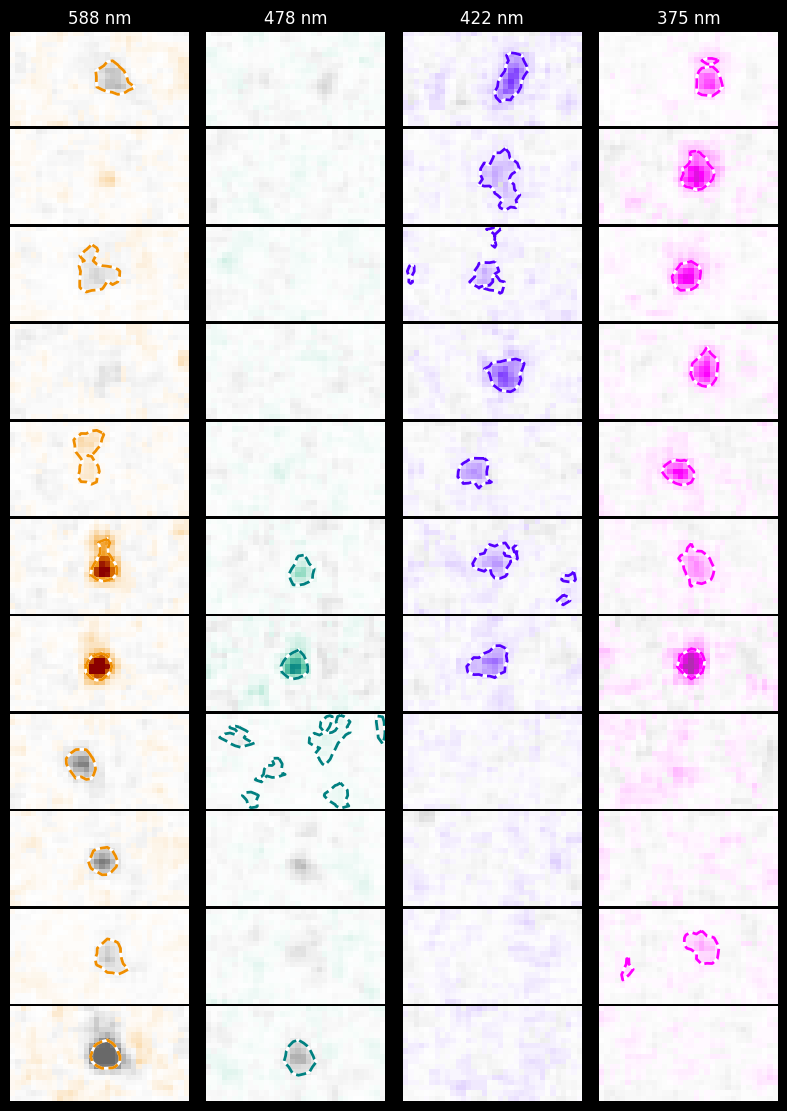

In [3]:
pygor.strf.plot.chroma_overview(loaded[0], None, contours = True)

C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_up

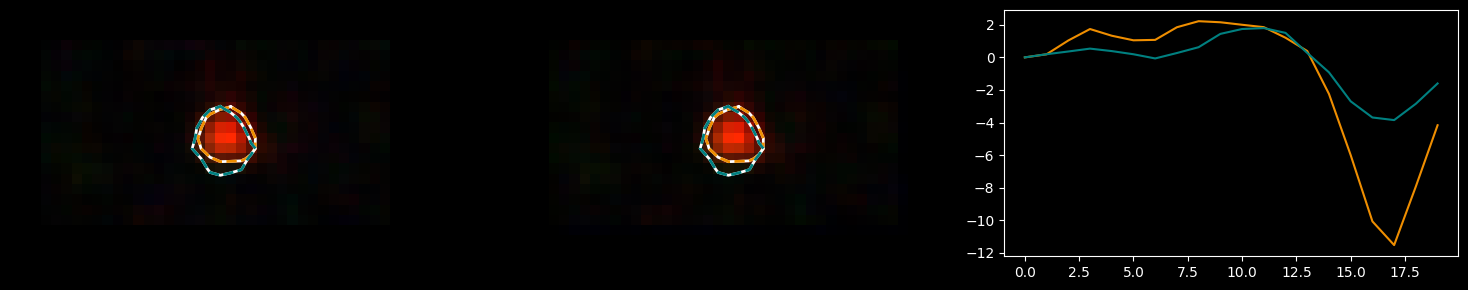

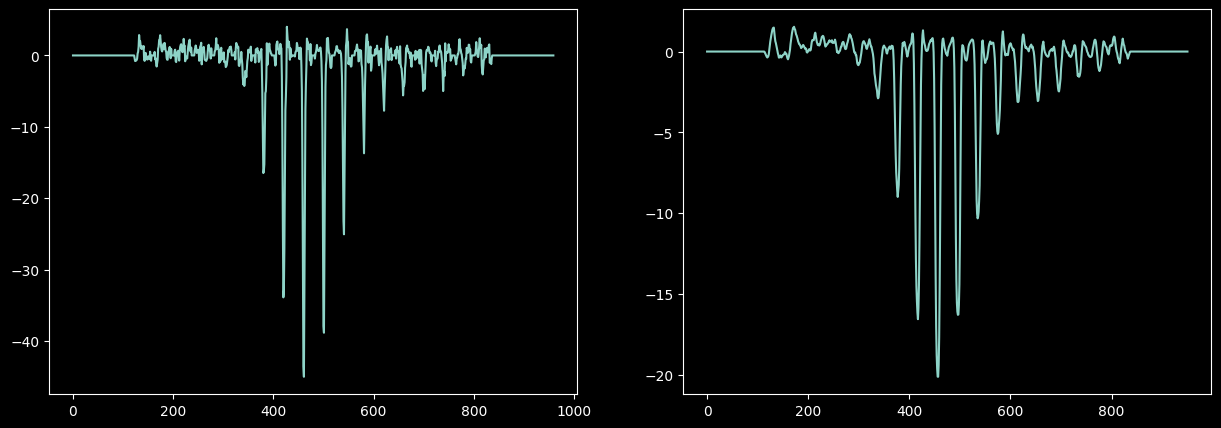

In [4]:



def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

roi = 0
rec = 0
signal = loaded[rec].collapse_times()[roi].data.flatten()
sliding_mean = running_mean(signal, 10)
#sliding_mean_sum = np.sum(sliding_mean)

pygor.strf.plot.visualise_summary(loaded[rec], specify_rois=roi);
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(signal)
ax[1].plot(sliding_mean)
#plt.axhline(sliding_mean_sum, 0, color = "r", alpha = 0.5)

# FAST ICA 

In [18]:
import logging

import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\simen\scikit_learn_data
Dataset consists of 400 faces


In [19]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

C:\Users\simen\AppData\Local\Temp\ipykernel_12320\1478903233.py:14: PendingDeprecationWarning: The set_constrained_layout_pads function will be deprecated in a future version. Use figure.get_layout_engine().set() instead.
  fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)


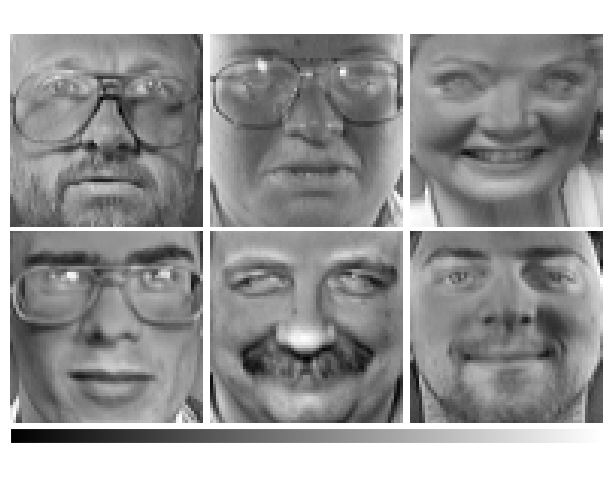

In [20]:
plot_gallery("Faces from dataset", faces_centered[:n_components])

C:\Users\simen\AppData\Local\Temp\ipykernel_12320\1478903233.py:14: PendingDeprecationWarning: The set_constrained_layout_pads function will be deprecated in a future version. Use figure.get_layout_engine().set() instead.
  fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)


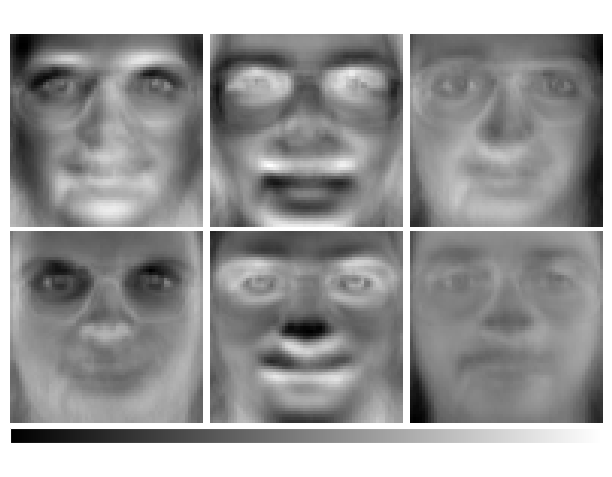

In [36]:
ica_estimator = decomposition.FastICA(
    n_components=n_components, max_iter=400, whiten="arbitrary-variance", tol=15e-5
)
ica_estimator.fit(faces_centered)
plot_gallery(
    "Independent components - FastICA", ica_estimator.components_[:n_components]
)

In [41]:
ica_estimator

FastICA(max_iter=400, n_components=6, tol=0.00015, whiten='arbitrary-variance')

In [107]:
loaded[0].strfs[0].shape[0]

20

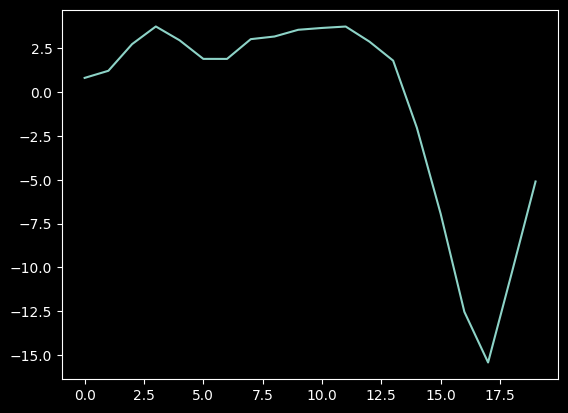

In [148]:
plt.plot(loaded[0].strfs[0][:, 10, 20])


In [208]:
loaded[0].get_pix_times()[0].shape

(20, 960)

In [717]:
rec = 0
roi = 1
inpu_arr = loaded[rec].get_pix_times()[roi]
n_c = 1
model = sklearn.decomposition.SparsePCA(n_components = n_c, alpha=3, method='lars', max_iter=1000)
model.fit(inpu_arr)
s = model.transform(inpu_arr)
fig.colorbar(org, ax = ax[1,0])
biggest_comp = np.unravel_index(np.argmax(np.abs(model.components_)), model.components_.shape)
recovered = model.components_[biggest_comp[0]]


C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_upper = _draw_contour_bipolar(arr_2d, abs_criteria)
C:\Users\simen\PhD\pygor\src\pygor\strf\contouring.py:188: UserWarning: Passed array did not meet absolute threshold criteria of 2.5
  contour_lower, contour_up

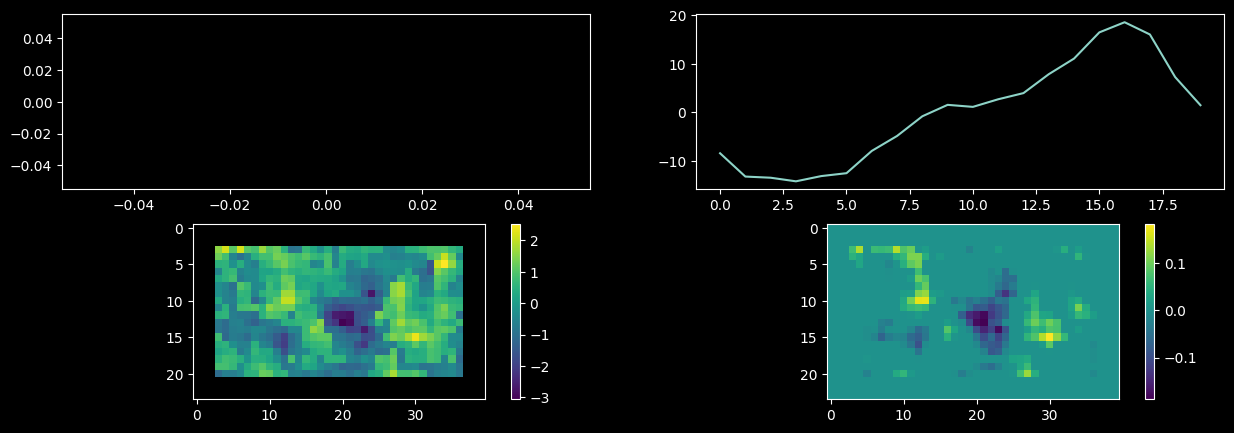

In [765]:
rec = 0
roi = 5
inpu_arr = loaded[rec].get_pix_times()[roi]
n_c = 1
model = sklearn.decomposition.MiniBatchSparsePCA(n_components = n_c, alpha=2, method='lars', max_iter=1000)
model.fit(inpu_arr)
s = model.transform(inpu_arr)
fig, ax = plt.subplots(2, 2, figsize = (15, 5))
ax[0,0].plot(loaded[rec].get_timecourses()[roi].T)
ax[0,1].plot(s)
org = ax[1,0].imshow(loaded[rec].collapse_times()[roi])
fig.colorbar(org, ax = ax[1,0])
biggest_comp = np.unravel_index(np.argmax(np.abs(model.components_)), model.components_.shape)
recovered = model.components_[biggest_comp[0]]
# comps = ax[1,1].imshow(model.components_[0].reshape(24, 40))
comps = ax[1,1].imshow(recovered.reshape(24, 40))
fig.colorbar(comps, ax = ax[1,1])

In [685]:
biggest_comp

0

In [766]:
pygor.plotting.play_movie(model.components_.reshape(n_c, 24, 40))

2024-04-23 16:17:42,485 INFO Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [767]:
pygor.plotting.play_movie(loaded[rec].strfs[roi])

2024-04-23 16:17:46,753 INFO Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [532]:
transformed.shape

(20, 2)

In [530]:
rec = 0
roi = 0
inpu_arr = loaded[rec].get_pix_times()[roi]
transformer = sklearn.decomposition.KernelPCA(n_components = 2, random_state = 0)
transformed = transformer.fit_transform(inpu_arr)

fig, ax = plt.subplots(2, 2, figsize = (15, 5))
ax[0,0].plot(loaded[rec].get_timecourses()[roi].T)
ax[0,1].plot(s[0])
# org = ax[1,0].imshow(loaded[rec].collapse_times()[roi])
# fig.colorbar(org, ax = ax[1,0])
# biggest_comp = np.unravel_index(np.argmax(model.components_), model.components_.shape)
# recovered = model.components_[biggest_comp[0]]
# comps = ax[1,1].imshow(model.components_[0].reshape(24, 40))
# fig.colorbar(comps, ax = ax[1,1])

In [185]:
loaded[0].strfs.shape

(44, 20, 24, 40)

In [17]:
ica.components_[:ica.n_components]

array([[ 4.99613047e-18,  8.88200973e-18,  0.00000000e+00,
        -1.15362192e-02, -3.09786552e-02,  2.13738505e-03,
         1.76549010e-02, -1.16793962e-04,  2.92093773e-02,
         1.42289757e-02,  2.55141681e-02, -9.26085677e-03,
        -4.64926286e-02, -2.50360272e-02, -2.37169530e-03,
         4.84206998e-03,  7.14758367e-02,  3.19184994e-02,
         2.15502501e-02,  1.72982891e-02,  3.73700398e-03,
         7.31598348e-02, -5.23542379e-02, -1.05621680e-01,
        -8.42311301e-02, -1.51696501e-01, -1.40722668e-01,
        -5.62237740e-02, -5.11965687e-02, -4.88776134e-02,
         3.70713787e-02,  2.48732833e-02,  4.47277514e-02,
         1.96807514e-02,  4.03669551e-02,  6.44930175e-02,
         4.45124606e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.99613047e-18,  8.88200973e-18,  0.00000000e+00,
        -1.15362192e-02, -3.09786552e-02,  2.13738505e-03,
         1.76549010e-02, -1.16793962e-04,  2.92093773e-02,
         1.42289757e-02,  2.55

# CFAR experimentation

In [ ]:
def cfar_detector(x, num_train, num_guard, rate_fa):
    """
    Detect peaks with CFAR algorithm.
    
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
 
    alpha = num_train*(rate_fa**(-1/num_train) - 1) # threshold factor
    
    peak_idx = []
    for i in range(num_side, num_cells - num_side):
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train 
        threshold = alpha * p_noise
        
        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx


-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- --
-- 0.7893169381483406
-- 2.352104005537545
-- 3.68749145599951
-- 5.124710550730249
-- 6.428193618924086
-- 7.348286212653162
-- 6.8293868864177245
-- 5.840181494172858
-- 3.471752353969453
-- -2.2385579100474415
-- -6.904103325576186
-- -12.482562499815717
-- -16.682934184532186
-- -20.097258038476056
-- -23.204165129035193
-- -26.652513914266528
-- -28.41061694875052
-- -29.408

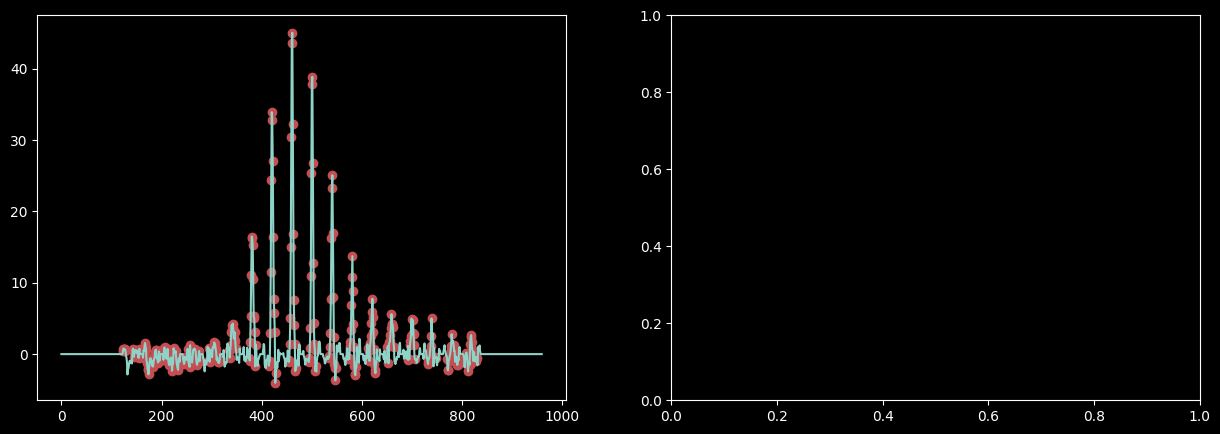

In [ ]:
import numpy as np
test_start = []
test_stop = []
def cfar_detector(signal, window_size, guard_size, threshold_factor):
    num_samples = len(signal)
    detected_targets = []
    # Prevent zero-components from influencing result
    signal = np.ma.masked_where(signal == 0, signal)
    # Iterate through the signal
    for i in range(num_samples):
        # Calculate the indices for the sliding window
        pre_test = signal[i - guard_size - window_size : i - guard_size]
        post_test = signal[1 + i + guard_size : 1 + i + guard_size + window_size]
        # Concat training cells
        training_cells = np.ma.concatenate((pre_test, post_test))
        # Calculate the threshold based on the training cells
        threshold = (np.ma.sum(training_cells) * threshold_factor)
        # Check if the current sample exceeds the threshold
        print(signal[i], threshold)
        if signal[i] > threshold: # optional mean of yet another window
            detected_targets.append(i)
    return detected_targets

# Testing
signal_input = signal * -1
window_size = 10
guard_size = 10
threshold_factor = 2
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
detected_targets = cfar_detector(signal_input, window_size, guard_size, threshold_factor)
mask = np.zeros(len(signal.flatten()))
mask[detected_targets] = 1
ax[0].plot(signal_input)
#ax[0].scatter(np.arange(len(signal_input)),signal_input)
ax[0].scatter(detected_targets, signal_input[detected_targets], c="r")
print("Detected targets:", detected_targets)

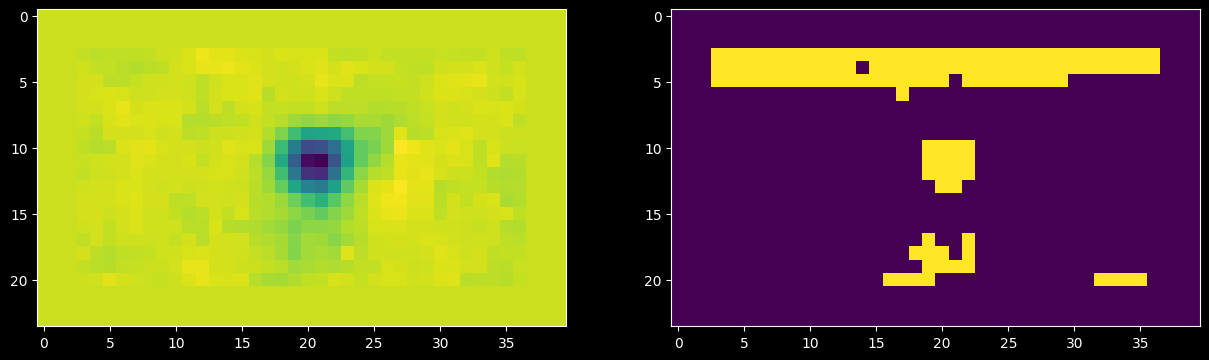

In [ ]:
shape = loaded[rec].collapse_times()[roi].data.shape
fig, ax = plt.subplots(1, 2, figsize = (15, 20))
ax[0].imshow(signal.reshape(shape))
ax[1].imshow(mask.astype(int).reshape(shape))